🎯 Loading Volatility Data and Targets for Visualization
📊 Processed Data: 4,081 rows × 100 columns
🎯 Targets Data: 4,081 rows × 7 columns
📅 Date Range: 2009-09-18 to 2025-05-09


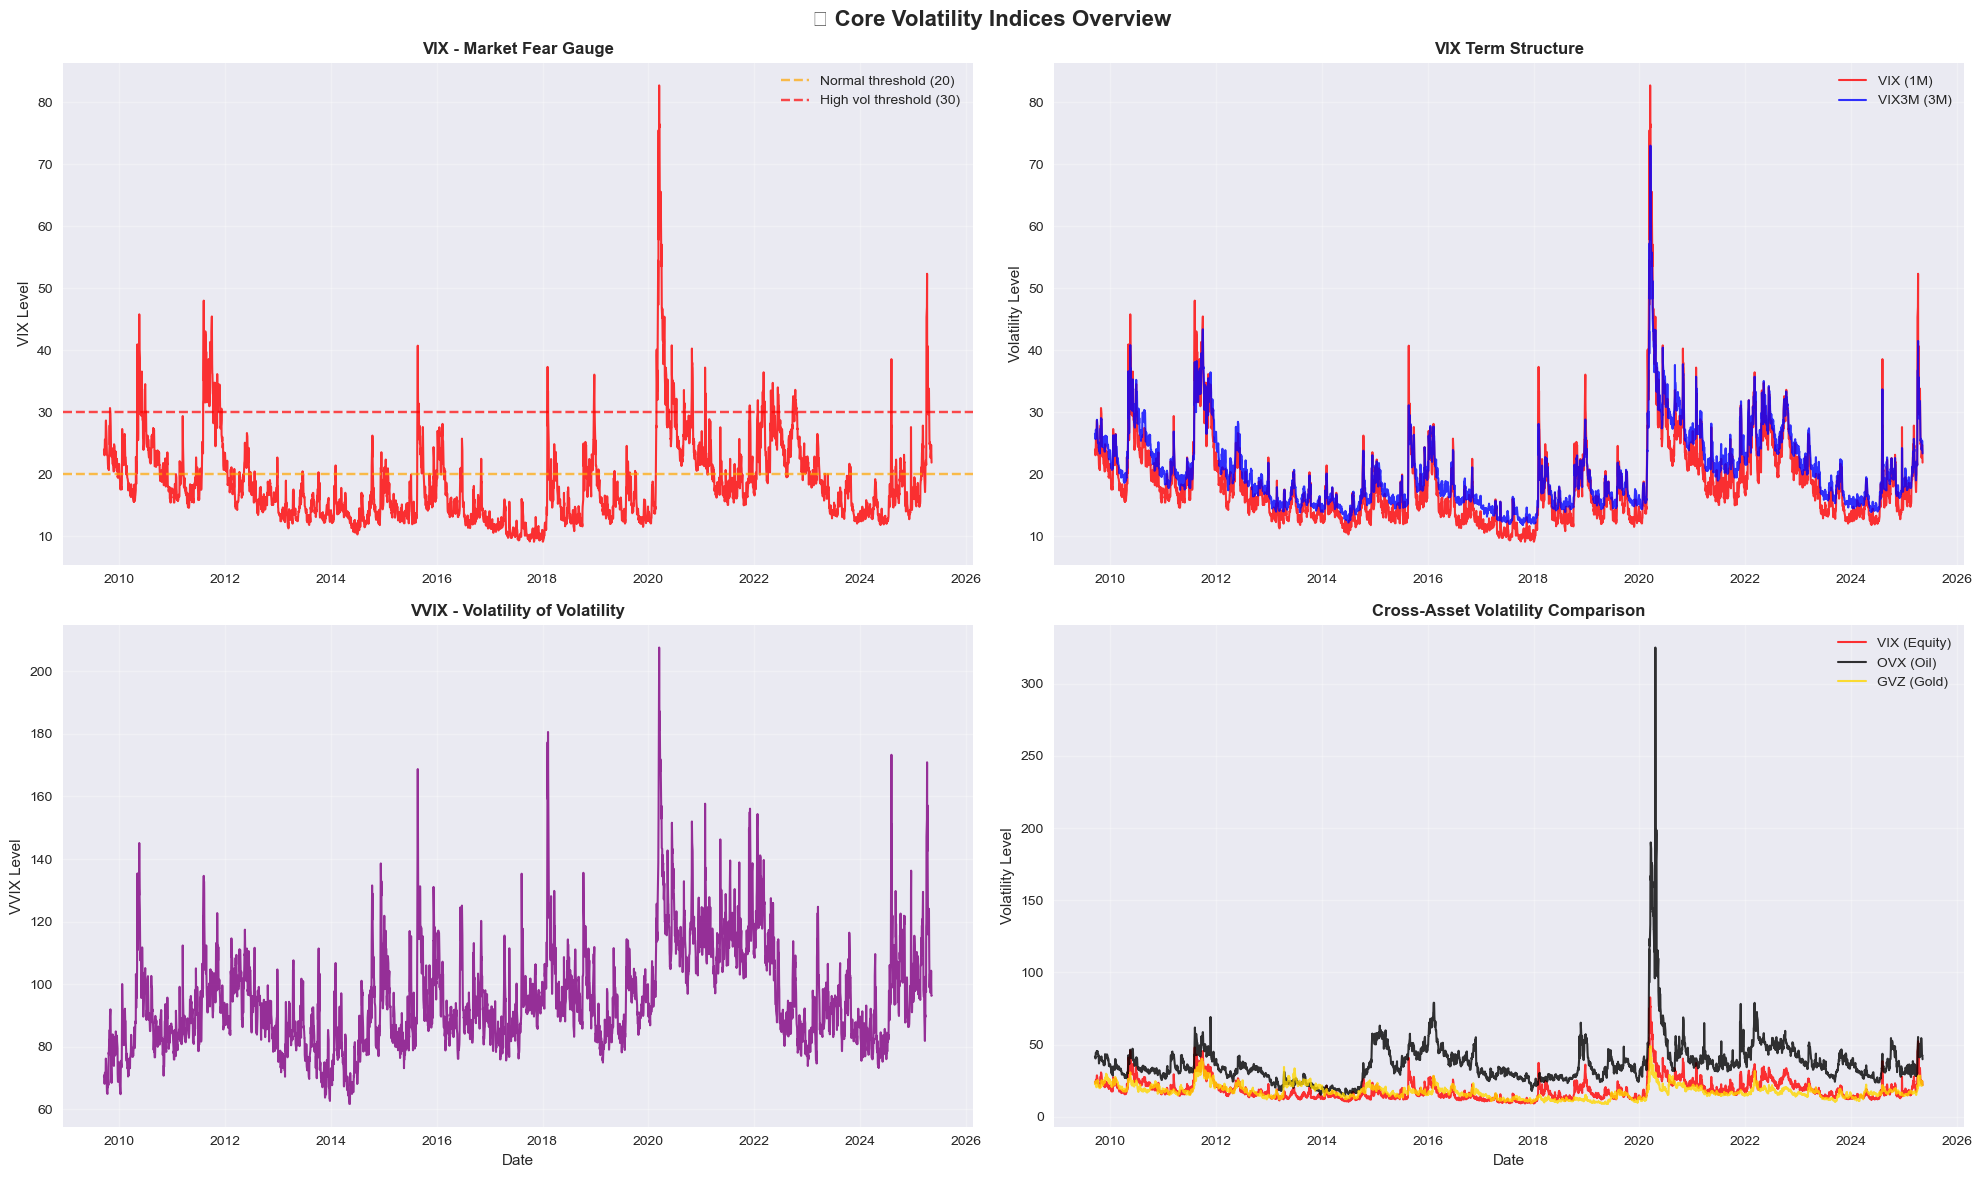

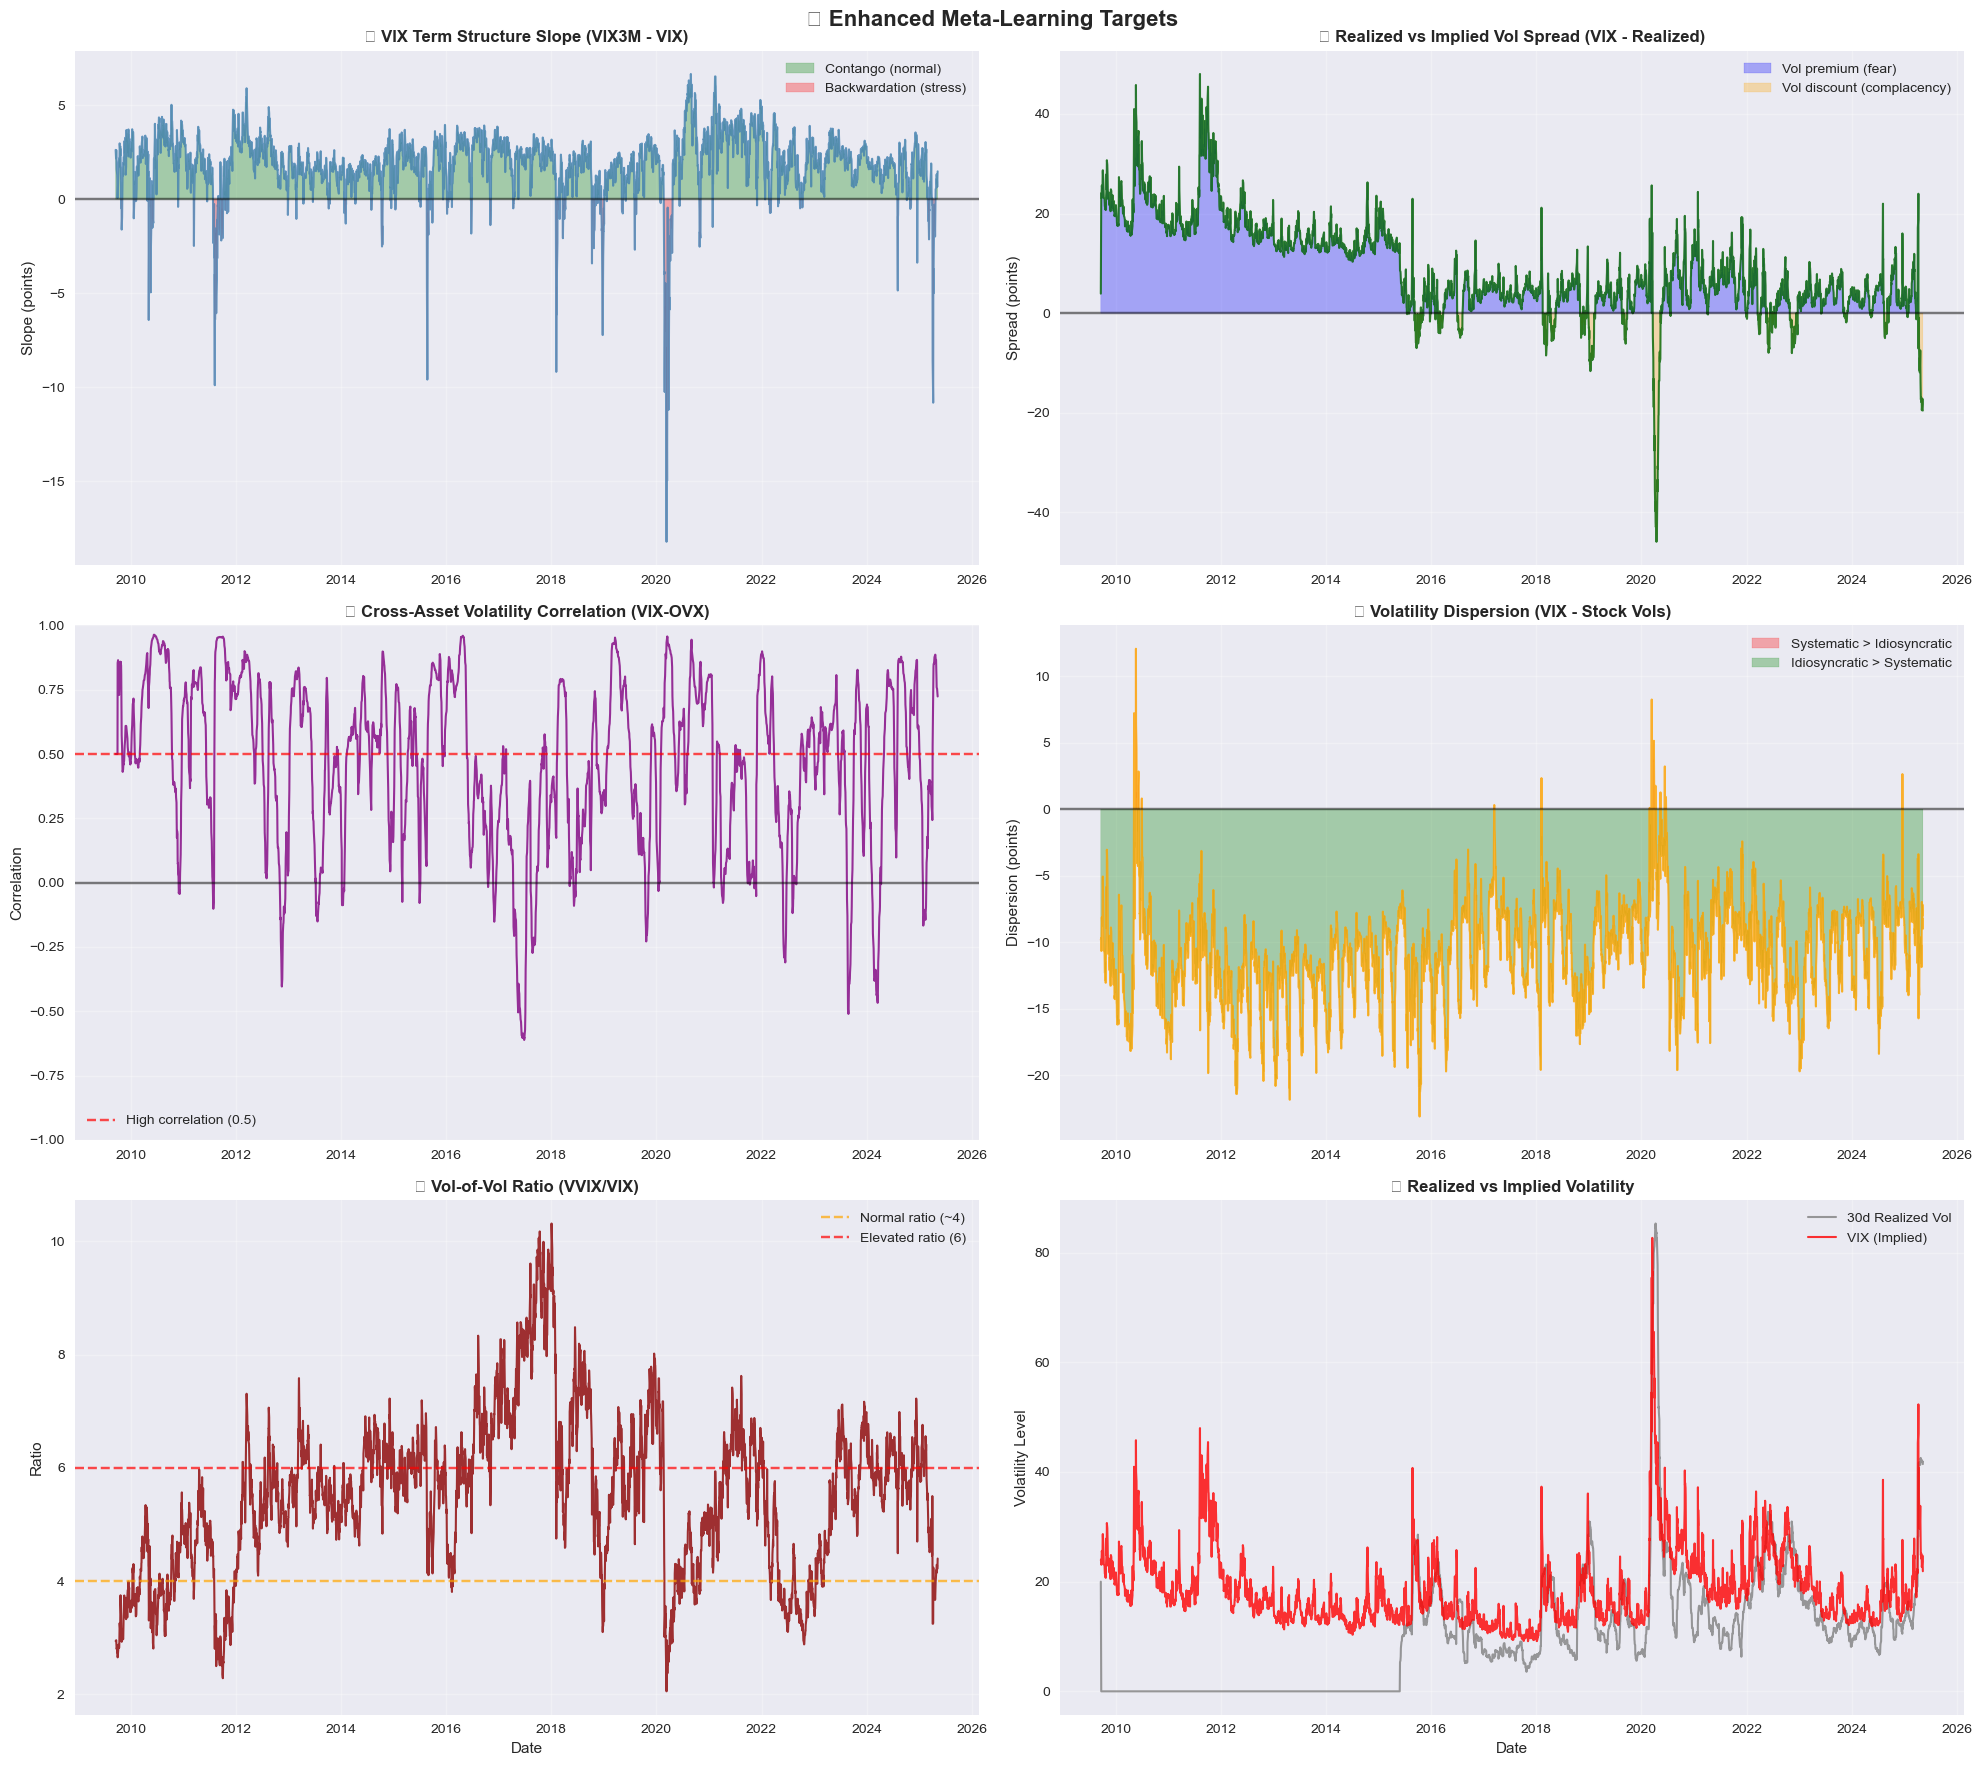


🎯 TARGET PROPERTIES SUMMARY

📊 Vix Term Structure Slope:
   Mean: 1.896, Std: 1.708
   Range: [-18.230, 6.660]
   Autocorr (1d): 0.903, (5d): 0.669
   Predictability: 🟢 High

📊 Realized Implied Spread:
   Mean: 8.812, Std: 9.525
   Range: [-45.881, 48.000]
   Autocorr (1d): 0.980, (5d): 0.925
   Predictability: 🟢 High

📊 Cross Asset Correlation:
   Mean: 0.465, Std: 0.326
   Range: [-0.611, 0.964]
   Autocorr (1d): 0.995, (5d): 0.927
   Predictability: 🟢 High

📊 Volatility Dispersion:
   Mean: -10.969, Std: 3.643
   Range: [-23.095, 12.051]
   Autocorr (1d): 0.917, (5d): 0.738
   Predictability: 🟢 High

📊 Vol Of Vol Ratio:
   Mean: 5.532, Std: 1.375
   Range: [2.054, 10.317]
   Autocorr (1d): 0.986, (5d): 0.936
   Predictability: 🟢 High


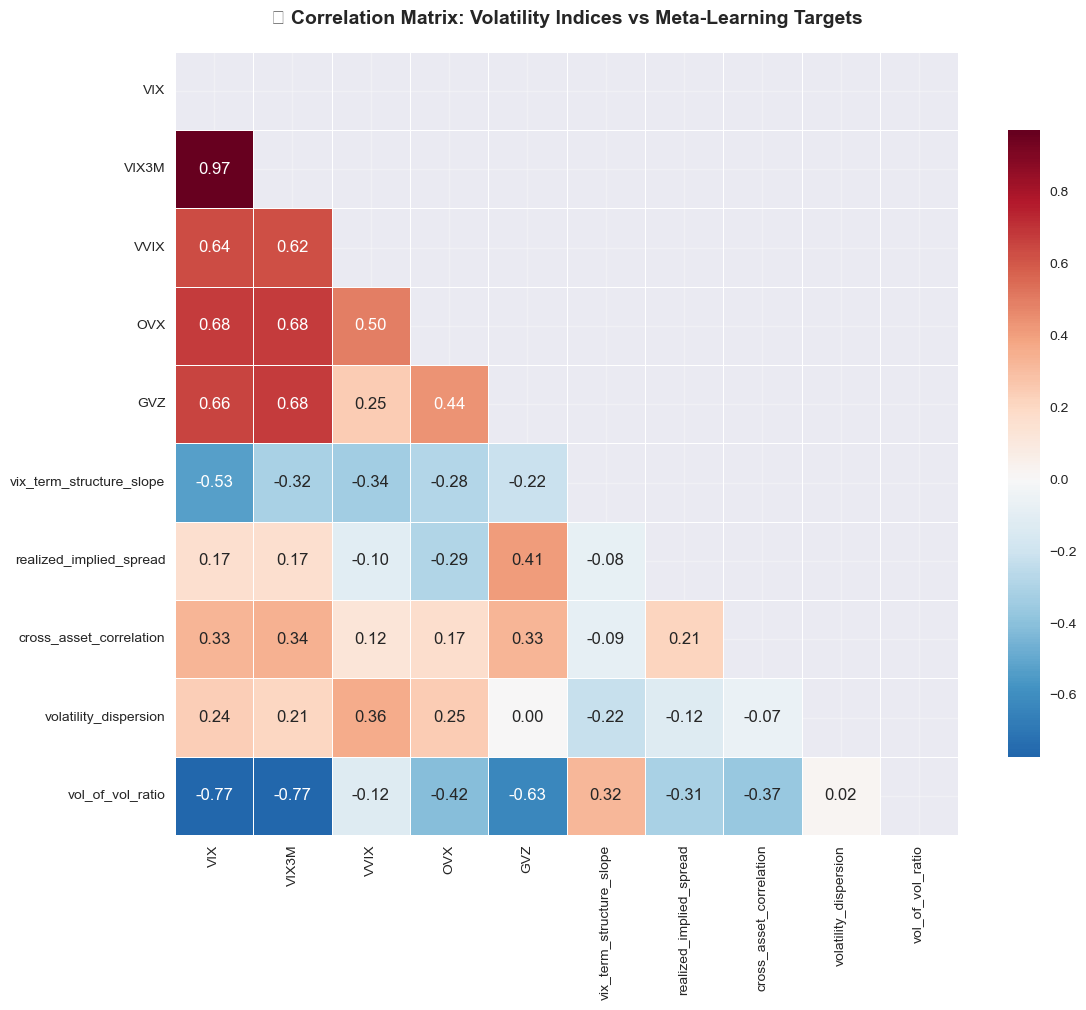


📈 MARKET REGIME THRESHOLDS
Low Vol: VIX ≤ 14.6
Normal: 14.6 < VIX < 19.5
High Vol: 19.5 ≤ VIX < 27.3
Crisis: VIX ≥ 27.3


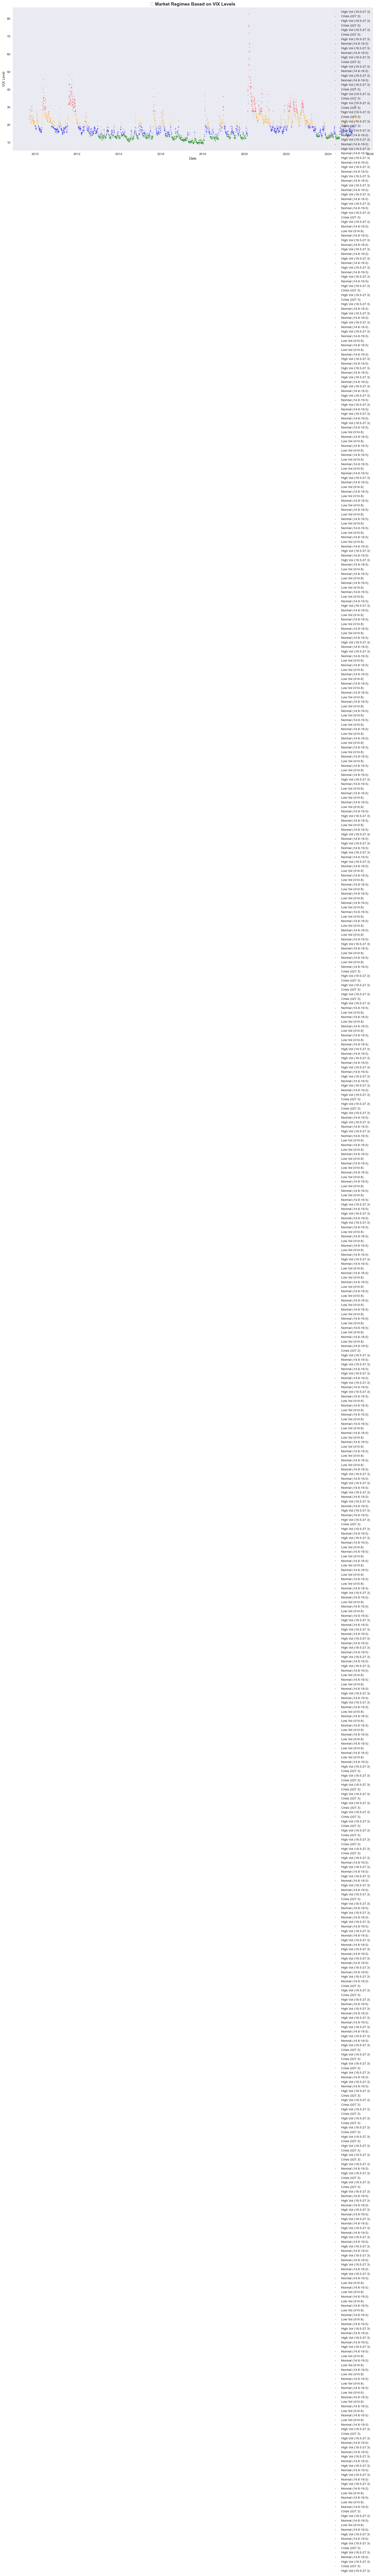


✅ VISUALIZATION COMPLETE!
🎯 Next Steps for Meta-Learning:
   1. These targets show clear regime-dependent behavior
   2. High autocorrelation suggests good predictability
   3. Ready to build regime detector and meta-learner
   4. NBEATSx will excel on trending targets
   5. TFT will handle regime interactions well
   6. DeepAR will provide uncertainty quantification


In [1]:
# Volatility Data and Targets Visualization
# Run this in a Jupyter notebook for interactive plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("🎯 Loading Volatility Data and Targets for Visualization")
print("="*60)

# Load the data
processed_data = pd.read_csv('data/processed/processed_volatility_data_final.csv')
targets_data = pd.read_csv('data/processed/volatility_targets_enhanced.csv')

# Convert dates
processed_data['date'] = pd.to_datetime(processed_data['date'])
targets_data['date'] = pd.to_datetime(targets_data['date'])

print(f"📊 Processed Data: {processed_data.shape[0]:,} rows × {processed_data.shape[1]:,} columns")
print(f"🎯 Targets Data: {targets_data.shape[0]:,} rows × {targets_data.shape[1]:,} columns")
print(f"📅 Date Range: {processed_data['date'].min().date()} to {processed_data['date'].max().date()}")

# =============================================================================
# PART 1: CORE VOLATILITY INDICES OVERVIEW
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('📈 Core Volatility Indices Overview', fontsize=16, fontweight='bold')

# VIX - The fear gauge
axes[0,0].plot(processed_data['date'], processed_data['VIX'], color='red', linewidth=1.5, alpha=0.8)
axes[0,0].set_title('VIX - Market Fear Gauge', fontweight='bold')
axes[0,0].set_ylabel('VIX Level')
axes[0,0].axhline(y=20, color='orange', linestyle='--', alpha=0.7, label='Normal threshold (20)')
axes[0,0].axhline(y=30, color='red', linestyle='--', alpha=0.7, label='High vol threshold (30)')
axes[0,0].legend()

# VIX vs VIX3M - Term structure
axes[0,1].plot(processed_data['date'], processed_data['VIX'], color='red', linewidth=1.5, alpha=0.8, label='VIX (1M)')
axes[0,1].plot(processed_data['date'], processed_data['VIX3M'], color='blue', linewidth=1.5, alpha=0.8, label='VIX3M (3M)')
axes[0,1].set_title('VIX Term Structure', fontweight='bold')
axes[0,1].set_ylabel('Volatility Level')
axes[0,1].legend()

# VVIX - Volatility of volatility
axes[1,0].plot(processed_data['date'], processed_data['VVIX'], color='purple', linewidth=1.5, alpha=0.8)
axes[1,0].set_title('VVIX - Volatility of Volatility', fontweight='bold')
axes[1,0].set_ylabel('VVIX Level')
axes[1,0].set_xlabel('Date')

# Cross-asset volatilities
axes[1,1].plot(processed_data['date'], processed_data['VIX'], color='red', linewidth=1.5, alpha=0.8, label='VIX (Equity)')
axes[1,1].plot(processed_data['date'], processed_data['OVX'], color='black', linewidth=1.5, alpha=0.8, label='OVX (Oil)')
axes[1,1].plot(processed_data['date'], processed_data['GVZ'], color='gold', linewidth=1.5, alpha=0.8, label='GVZ (Gold)')
axes[1,1].set_title('Cross-Asset Volatility Comparison', fontweight='bold')
axes[1,1].set_ylabel('Volatility Level')
axes[1,1].set_xlabel('Date')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# =============================================================================
# PART 2: ENHANCED TARGETS VISUALIZATION
# =============================================================================

fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('🎯 Enhanced Meta-Learning Targets', fontsize=16, fontweight='bold')

# Target 1: VIX Term Structure Slope
axes[0,0].plot(targets_data['date'], targets_data['vix_term_structure_slope'], 
               color='steelblue', linewidth=1.5, alpha=0.8)
axes[0,0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[0,0].set_title('🔹 VIX Term Structure Slope (VIX3M - VIX)', fontweight='bold')
axes[0,0].set_ylabel('Slope (points)')
axes[0,0].fill_between(targets_data['date'], targets_data['vix_term_structure_slope'], 0, 
                       where=(targets_data['vix_term_structure_slope'] > 0), 
                       color='green', alpha=0.3, label='Contango (normal)')
axes[0,0].fill_between(targets_data['date'], targets_data['vix_term_structure_slope'], 0, 
                       where=(targets_data['vix_term_structure_slope'] < 0), 
                       color='red', alpha=0.3, label='Backwardation (stress)')
axes[0,0].legend()

# Target 2: Realized vs Implied Spread
axes[0,1].plot(targets_data['date'], targets_data['realized_implied_spread'], 
               color='darkgreen', linewidth=1.5, alpha=0.8)
axes[0,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[0,1].set_title('🔹 Realized vs Implied Vol Spread (VIX - Realized)', fontweight='bold')
axes[0,1].set_ylabel('Spread (points)')
axes[0,1].fill_between(targets_data['date'], targets_data['realized_implied_spread'], 0, 
                       where=(targets_data['realized_implied_spread'] > 0), 
                       color='blue', alpha=0.3, label='Vol premium (fear)')
axes[0,1].fill_between(targets_data['date'], targets_data['realized_implied_spread'], 0, 
                       where=(targets_data['realized_implied_spread'] < 0), 
                       color='orange', alpha=0.3, label='Vol discount (complacency)')
axes[0,1].legend()

# Target 3: Cross-Asset Correlation
axes[1,0].plot(targets_data['date'], targets_data['cross_asset_correlation'], 
               color='purple', linewidth=1.5, alpha=0.8)
axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High correlation (0.5)')
axes[1,0].set_title('🔹 Cross-Asset Volatility Correlation (VIX-OVX)', fontweight='bold')
axes[1,0].set_ylabel('Correlation')
axes[1,0].set_ylim(-1, 1)
axes[1,0].legend()

# Target 4: Volatility Dispersion
axes[1,1].plot(targets_data['date'], targets_data['volatility_dispersion'], 
               color='orange', linewidth=1.5, alpha=0.8)
axes[1,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1,1].set_title('🔹 Volatility Dispersion (VIX - Stock Vols)', fontweight='bold')
axes[1,1].set_ylabel('Dispersion (points)')
axes[1,1].fill_between(targets_data['date'], targets_data['volatility_dispersion'], 0, 
                       where=(targets_data['volatility_dispersion'] > 0), 
                       color='red', alpha=0.3, label='Systematic > Idiosyncratic')
axes[1,1].fill_between(targets_data['date'], targets_data['volatility_dispersion'], 0, 
                       where=(targets_data['volatility_dispersion'] < 0), 
                       color='green', alpha=0.3, label='Idiosyncratic > Systematic')
axes[1,1].legend()

# Target 5: Vol-of-Vol Ratio
axes[2,0].plot(targets_data['date'], targets_data['vol_of_vol_ratio'], 
               color='darkred', linewidth=1.5, alpha=0.8)
axes[2,0].axhline(y=4, color='orange', linestyle='--', alpha=0.7, label='Normal ratio (~4)')
axes[2,0].axhline(y=6, color='red', linestyle='--', alpha=0.7, label='Elevated ratio (6)')
axes[2,0].set_title('🔹 Vol-of-Vol Ratio (VVIX/VIX)', fontweight='bold')
axes[2,0].set_ylabel('Ratio')
axes[2,0].set_xlabel('Date')
axes[2,0].legend()

# Realized Volatility vs VIX
axes[2,1].plot(targets_data['date'], targets_data['realized_volatility_30d'], 
               color='gray', linewidth=1.5, alpha=0.8, label='30d Realized Vol')
axes[2,1].plot(processed_data['date'], processed_data['VIX'], 
               color='red', linewidth=1.5, alpha=0.8, label='VIX (Implied)')
axes[2,1].set_title('🔹 Realized vs Implied Volatility', fontweight='bold')
axes[2,1].set_ylabel('Volatility Level')
axes[2,1].set_xlabel('Date')
axes[2,1].legend()

plt.tight_layout()
plt.show()

# =============================================================================
# PART 3: TARGET PROPERTIES ANALYSIS
# =============================================================================

# Calculate some key statistics for display
target_cols = ['vix_term_structure_slope', 'realized_implied_spread', 
               'cross_asset_correlation', 'volatility_dispersion', 'vol_of_vol_ratio']

print("\n🎯 TARGET PROPERTIES SUMMARY")
print("="*60)

for col in target_cols:
    if col in targets_data.columns:
        series = targets_data[col].dropna()
        autocorr_1d = series.autocorr(lag=1)
        autocorr_5d = series.autocorr(lag=5)
        
        print(f"\n📊 {col.replace('_', ' ').title()}:")
        print(f"   Mean: {series.mean():.3f}, Std: {series.std():.3f}")
        print(f"   Range: [{series.min():.3f}, {series.max():.3f}]")
        print(f"   Autocorr (1d): {autocorr_1d:.3f}, (5d): {autocorr_5d:.3f}")
        
        # Predictability assessment
        if abs(autocorr_1d) > 0.7:
            predictability = "🟢 High"
        elif abs(autocorr_1d) > 0.4:
            predictability = "🟡 Moderate"
        else:
            predictability = "🔴 Low"
        print(f"   Predictability: {predictability}")

# =============================================================================
# PART 4: CORRELATION HEATMAP
# =============================================================================

plt.figure(figsize=(12, 10))

# Select key variables for correlation analysis
corr_cols = ['VIX', 'VIX3M', 'VVIX', 'OVX', 'GVZ'] + target_cols
available_corr_cols = [col for col in corr_cols if col in targets_data.columns or col in processed_data.columns]

# Merge datasets for correlation
merged_data = pd.merge(processed_data[['date'] + [col for col in ['VIX', 'VIX3M', 'VVIX', 'OVX', 'GVZ'] if col in processed_data.columns]], 
                      targets_data[['date'] + [col for col in target_cols if col in targets_data.columns]], 
                      on='date', how='inner')

# Calculate correlation matrix
corr_matrix = merged_data.select_dtypes(include=[np.number]).corr()

# Create heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f')

plt.title('🔗 Correlation Matrix: Volatility Indices vs Meta-Learning Targets', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# =============================================================================
# PART 5: REGIME ANALYSIS
# =============================================================================

# Define market regimes based on VIX levels
vix_data = processed_data.set_index('date')['VIX']
low_thresh = vix_data.quantile(0.33)
high_thresh = vix_data.quantile(0.67)
crisis_thresh = vix_data.quantile(0.90)

print(f"\n📈 MARKET REGIME THRESHOLDS")
print("="*40)
print(f"Low Vol: VIX ≤ {low_thresh:.1f}")
print(f"Normal: {low_thresh:.1f} < VIX < {high_thresh:.1f}")
print(f"High Vol: {high_thresh:.1f} ≤ VIX < {crisis_thresh:.1f}")
print(f"Crisis: VIX ≥ {crisis_thresh:.1f}")

# Create regime visualization
fig, ax = plt.subplots(figsize=(20, 8))

# Plot VIX with regime coloring
vix_dates = processed_data['date']
vix_values = processed_data['VIX']

# Color code by regime
colors = []
for vix in vix_values:
    if vix <= low_thresh:
        colors.append('green')
    elif vix < high_thresh:
        colors.append('blue')
    elif vix < crisis_thresh:
        colors.append('orange')
    else:
        colors.append('red')

# Create scatter plot with regime colors
for i, (date, vix, color) in enumerate(zip(vix_dates, vix_values, colors)):
    if i == 0 or colors[i] != colors[i-1]:  # Only add to legend on color change
        if color == 'green':
            label = f'Low Vol (≤{low_thresh:.1f})'
        elif color == 'blue':
            label = f'Normal ({low_thresh:.1f}-{high_thresh:.1f})'
        elif color == 'orange':
            label = f'High Vol ({high_thresh:.1f}-{crisis_thresh:.1f})'
        else:
            label = f'Crisis (≥{crisis_thresh:.1f})'
        ax.scatter(date, vix, c=color, s=2, alpha=0.7, label=label)
    else:
        ax.scatter(date, vix, c=color, s=2, alpha=0.7)

ax.set_title('📊 Market Regimes Based on VIX Levels', fontsize=14, fontweight='bold')
ax.set_ylabel('VIX Level')
ax.set_xlabel('Date')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ VISUALIZATION COMPLETE!")
print("="*40)
print("🎯 Next Steps for Meta-Learning:")
print("   1. These targets show clear regime-dependent behavior")
print("   2. High autocorrelation suggests good predictability")
print("   3. Ready to build regime detector and meta-learner")
print("   4. NBEATSx will excel on trending targets")
print("   5. TFT will handle regime interactions well")
print("   6. DeepAR will provide uncertainty quantification")